## Binary Image Classification (Cat vs Dog) Using CNN
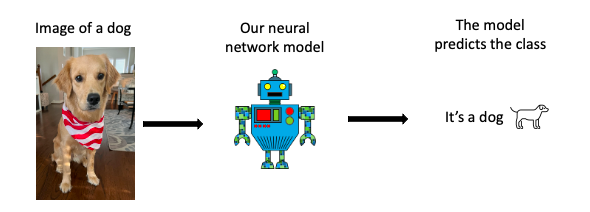

## Neural Network Concepts

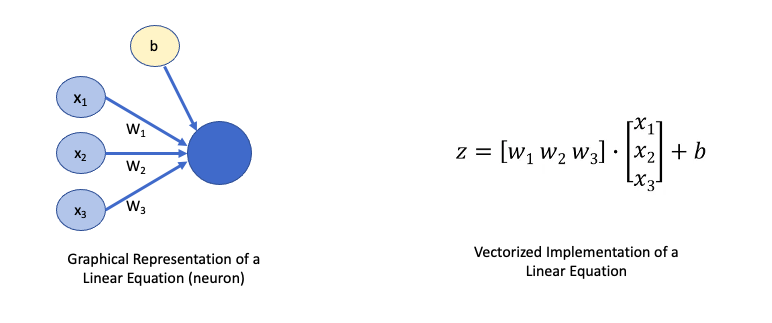


The above graph simply represents the equation:

𝑦=𝑤1∗𝑥1+𝑤2∗𝑥2+𝑤3∗𝑥3+𝑏
Where the w1, w2, w3 are called the weights and b is an intercept term called bias. The equation can also be vectorised like this:

𝑦=𝑊.𝑋+𝑏
Where X = [x1, x2, x3] and W = [w1, w2, w3].T. The .T means transpose. This is because we want the dot product to give us the result we want i.e. w1 * x1 + w2 * x2 + w3 * x3. This gives us the vectorised version of our linear equation.

**Activation function** The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks. The activation function compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. For example, the sigmoid activation function converts its input to a probability value between 0 and 1.

ReLU, Sigmoid, Tanh are 3 the popular activation functions (non-linear) used in deep learning architectures.



## Import libraries 

In [1]:
import os
import zipfile
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


## Simple Neural Network model with 3 Layers

In [2]:
model = Sequential()
model.add(Dense(3,activation='sigmoid', input_dim=2))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Loading the images

In [4]:
#Create separate train and validation directory as the structure has been followed in the original dataset.

folder_path = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(folder_path, 'train')
test_dir = os.path.join(folder_path, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

#Check out number of cat and dog images in train and validation folder

print("Number of cat images in train folder:",len(os.listdir(train_cats_dir)))
print("Number of dog images in train folder:",len(os.listdir(train_dogs_dir)))
print("Number of cat images in validation folder:",len(os.listdir(test_cats_dir)))
print("Number of dog images in validation folder:",len(os.listdir(test_dogs_dir)))

Number of cat images in train folder: 1000
Number of dog images in train folder: 1000
Number of cat images in validation folder: 500
Number of dog images in validation folder: 500


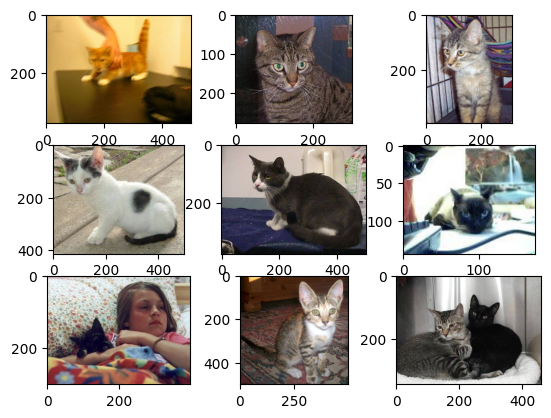

In [5]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = os.path.join(folder_path, train_cats_dir)

# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)

 # define filename
 filename = folder + '/cat.' + str(i) + '.jpg' #change the file name to switch between cat and dog images

 # load image pixels
 image = imread(filename)

 # plot raw pixel data
 pyplot.imshow(image)

# show the figure
pyplot.show()


## Image normalization and rescaling

The image pixel values range between 0 to 255, thus to normalize the images we have to use ImageDataGenerator class which will genrate batches of normalized input images based out of the train and validation directory.
Target size of the image selected as (150,150) but it can be rescaled later. Since this project only deals with only two class (Cat and Dog) of images so the class_mode selected as 'binary' for generating the flow of training and validation images.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by ImageGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Convolutional neural network model for image classification

Now, it's time to build the model for classification. I have used Keras module of Tensorflow framework to obtain most common model for this work. In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the tf.keras.Sequential model. Brief overview of the model components :

**Conv2D:** is a 2D Convolution Layer, this layer creates a convolution kernel which helps produce a tensor of outputs.

**Kernel:** In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

**Sequential:** That defines a SEQUENCE of layers in the neural network

**Flatten:** Change the multi-dimesional input to one dimension for better model processing

**Maxpooling2D:** Sample based discretization process to down-sample an input representation(input image, hidden layers, matrix etc.) in order to simplify the processing.

**Dense:** Add layers of neurons and each neuron comes with activation functions such as Relu or Sigmoid. Relu is more computionally efficient because the gradient value is either 0 or 1 as opposed to sigmoid which keep fractions of 0 to 1 as gradient value. Relu seems to be converges faster than sigmoid function.

**sigmoid:** The actication function takes the maxium value coming out of output layer which saves a lot of coding work.

In [7]:
#Basic coding structure for the conv2d layer: keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), activation=None, input

from tensorflow.keras.optimizers import RMSprop

model_1 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,input_shape=[150,150,3],kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid'),

])

model_1.summary()

model_1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 165888)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [8]:
train_model = model_1.fit(
      train_generator,
      steps_per_epoch=80,  # 2000 images = batch_size * steps
      epochs=25,
      validation_data=validation_generator,
      validation_steps=40,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/25
80/80 - 9s - loss: 0.9414 - acc: 0.5250 - val_loss: 0.6718 - val_acc: 0.5337 - 9s/epoch - 114ms/step
Epoch 2/25
80/80 - 4s - loss: 0.6792 - acc: 0.5925 - val_loss: 0.6472 - val_acc: 0.6475 - 4s/epoch - 50ms/step
Epoch 3/25
80/80 - 4s - loss: 0.6213 - acc: 0.6800 - val_loss: 0.5660 - val_acc: 0.7188 - 4s/epoch - 50ms/step
Epoch 4/25
80/80 - 4s - loss: 0.5526 - acc: 0.7125 - val_loss: 0.5415 - val_acc: 0.7350 - 4s/epoch - 50ms/step
Epoch 5/25
80/80 - 4s - loss: 0.4770 - acc: 0.7669 - val_loss: 0.5908 - val_acc: 0.6950 - 4s/epoch - 49ms/step
Epoch 6/25
80/80 - 4s - loss: 0.3911 - acc: 0.8206 - val_loss: 0.5501 - val_acc: 0.7100 - 4s/epoch - 50ms/step
Epoch 7/25
80/80 - 4s - loss: 0.2989 - acc: 0.8744 - val_loss: 0.5662 - val_acc: 0.7038 - 4s/epoch - 50ms/step
Epoch 8/25
80/80 - 4s - loss: 0.2197 - acc: 0.9169 - val_loss: 0.6682 - val_acc: 0.7250 - 4s/epoch - 50ms/step
Epoch 9/25
80/80 - 4s - loss: 0.1830 - acc: 0.9413 - val_loss: 0.7392 - val_acc: 0.7262 - 4s/epoch - 52ms/step


## Evaluate the base model performance

<ipython-input-9-2ab0c8250b76>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
<ipython-input-9-2ab0c8250b76>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
<ipython-input-9-2ab0c8250b76>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
<ipython-input-9-2ab0c8250b76>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 

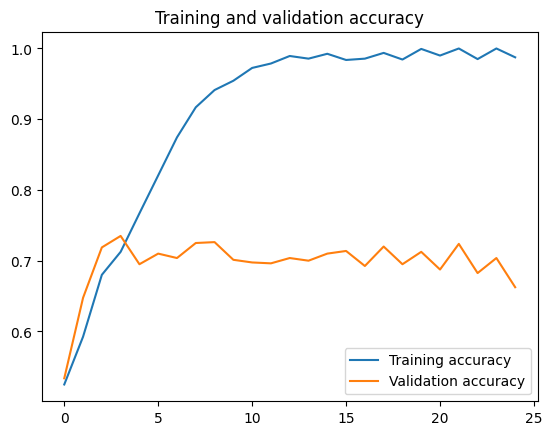

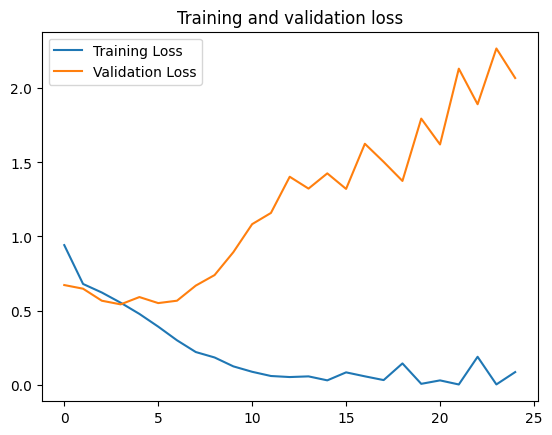

In [9]:
import matplotlib.pyplot as plt
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color ='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Prevent model overfitting issue

**Image augmentation:** It is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. ImageDataGenerator class with all data augmmentation techniques: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


**Dropout:** It is a regularization approach that prevents overfitting by ensuring that no units are codependent with one another.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by ImageGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
from tensorflow.keras.optimizers import RMSprop

model_2 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,input_shape=[150,150,3],kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid'),

])

model_2.summary()

model_2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 36, 36, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 165888)           

In [12]:
train_model_aug = model_2.fit(
      train_generator,
      steps_per_epoch=80,  # 2000 images = batch_size * steps
      epochs=25,
      validation_data=validation_generator,
      validation_steps=40,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/25
80/80 - 13s - loss: 1.0599 - acc: 0.5294 - val_loss: 0.6877 - val_acc: 0.5225 - 13s/epoch - 159ms/step
Epoch 2/25
80/80 - 11s - loss: 0.7062 - acc: 0.5369 - val_loss: 0.6877 - val_acc: 0.5238 - 11s/epoch - 141ms/step
Epoch 3/25
80/80 - 11s - loss: 0.6791 - acc: 0.6031 - val_loss: 0.6704 - val_acc: 0.5663 - 11s/epoch - 140ms/step
Epoch 4/25
80/80 - 11s - loss: 0.6611 - acc: 0.6244 - val_loss: 0.6604 - val_acc: 0.5688 - 11s/epoch - 140ms/step
Epoch 5/25
80/80 - 11s - loss: 0.6461 - acc: 0.6231 - val_loss: 0.6226 - val_acc: 0.6525 - 11s/epoch - 139ms/step
Epoch 6/25
80/80 - 11s - loss: 0.6290 - acc: 0.6569 - val_loss: 0.6497 - val_acc: 0.6463 - 11s/epoch - 141ms/step
Epoch 7/25
80/80 - 11s - loss: 0.5890 - acc: 0.6812 - val_loss: 0.6086 - val_acc: 0.6488 - 11s/epoch - 142ms/step
Epoch 8/25
80/80 - 11s - loss: 0.5944 - acc: 0.6837 - val_loss: 0.6263 - val_acc: 0.6650 - 11s/epoch - 140ms/step
Epoch 9/25
80/80 - 11s - loss: 0.5941 - acc: 0.6931 - val_loss: 0.5681 - val_acc: 0.6913

<ipython-input-13-10dea32075ed>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
<ipython-input-13-10dea32075ed>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
<ipython-input-13-10dea32075ed>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
<ipython-input-13-10dea32075ed>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0

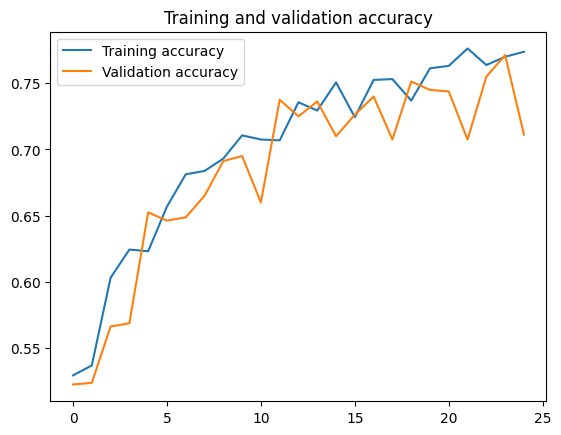

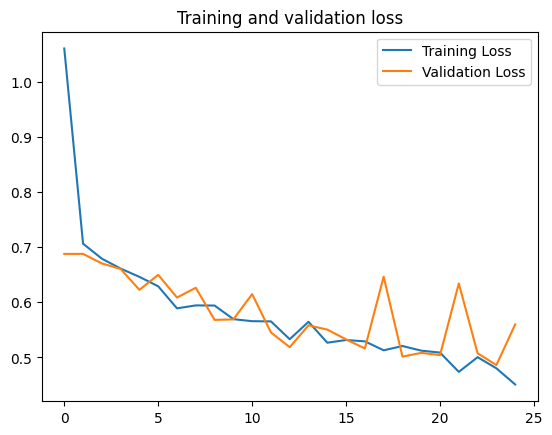

In [13]:
import matplotlib.pyplot as plt
acc = train_model_aug.history['acc']
val_acc = train_model_aug.history['val_acc']
loss = train_model_aug.history['loss']
val_loss = train_model_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color ='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()

###  Adding one convolutional layer with 128 neurons, after the second MaxPooling2D layer in above code


In [14]:
from tensorflow.keras.optimizers import Adam

model_3 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,input_shape=[150,150,3],kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'), ## new layers addition as a part of practice activity
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid'),

])

model_3.summary()

model_3.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [15]:
train_model_practice = model_3.fit(
      train_generator,
      steps_per_epoch=40,  # 2000 images = batch_size * steps
      epochs=50,
      validation_data=validation_generator,
      validation_steps=20,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
40/40 - 8s - loss: 0.7243 - acc: 0.4750 - val_loss: 0.6931 - val_acc: 0.4950 - 8s/epoch - 211ms/step
Epoch 2/50
40/40 - 6s - loss: 0.6932 - acc: 0.4988 - val_loss: 0.6931 - val_acc: 0.5025 - 6s/epoch - 142ms/step
Epoch 3/50
40/40 - 6s - loss: 0.6931 - acc: 0.5275 - val_loss: 0.6930 - val_acc: 0.5200 - 6s/epoch - 145ms/step
Epoch 4/50
40/40 - 6s - loss: 0.6930 - acc: 0.5163 - val_loss: 0.6934 - val_acc: 0.4875 - 6s/epoch - 143ms/step
Epoch 5/50
40/40 - 6s - loss: 0.6933 - acc: 0.4950 - val_loss: 0.6931 - val_acc: 0.5050 - 6s/epoch - 144ms/step
Epoch 6/50
40/40 - 6s - loss: 0.6930 - acc: 0.5163 - val_loss: 0.6936 - val_acc: 0.4725 - 6s/epoch - 142ms/step
Epoch 7/50
40/40 - 6s - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.4900 - 6s/epoch - 142ms/step
Epoch 8/50
40/40 - 6s - loss: 0.6929 - acc: 0.5138 - val_loss: 0.6930 - val_acc: 0.5075 - 6s/epoch - 143ms/step
Epoch 9/50
40/40 - 6s - loss: 0.6925 - acc: 0.5312 - val_loss: 0.6927 - val_acc: 0.5175 - 6s/epoch - 142

<ipython-input-16-62636667dc3b>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
<ipython-input-16-62636667dc3b>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
<ipython-input-16-62636667dc3b>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
<ipython-input-16-62636667dc3b>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0

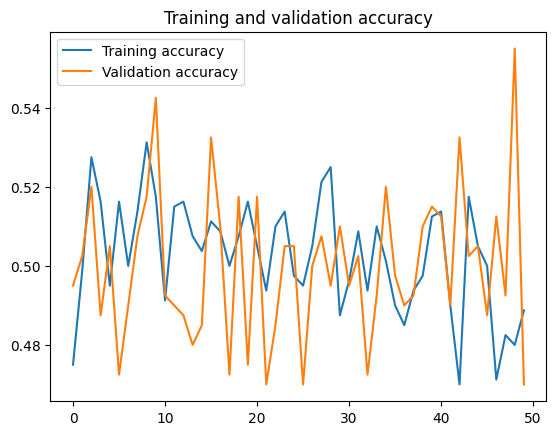

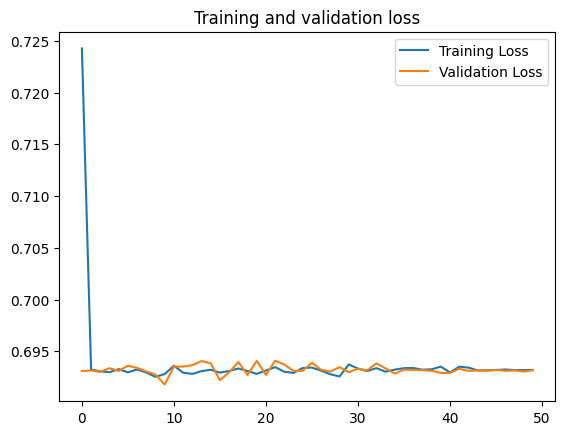

In [16]:
import matplotlib.pyplot as plt
acc = train_model_practice.history['acc']
val_acc = train_model_practice.history['val_acc']
loss = train_model_practice.history['loss']
val_loss = train_model_practice.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color ='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving Sample image 1.jpg to Sample image 1.jpg
1/1 [==============================] - 0s 260ms/step
[0.50016487]
Sample image 1.jpg is a dog


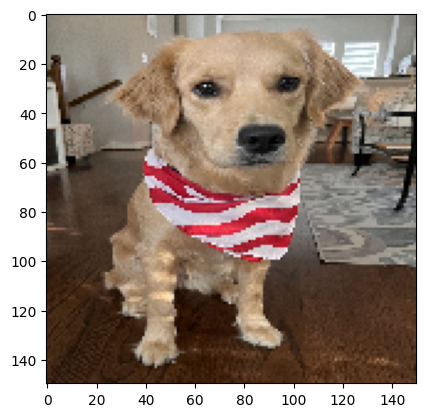

In [17]:
# Here's a codeblock just for fun. You should be able to upload your pet image here
# and have it classified as either dog or cat

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images based on the final model_3 we developed during the practice activity
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  pyplot.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_3.predict(images, batch_size=10)

  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")
